Improved Algorithm

In [ ]:
time_list_improved=[]

for min_sup in range(10,20,1):

  import pandas as pd
  import numpy as np
  data = pd.read_csv('/content/retail.txt', sep='|', header=0, skipinitialspace=True)
  data.dropna(inplace=True)
  print("##################################################################################################################################################3")
  data = pd.DataFrame(data)
  data['items'] = data.iloc[:1000,0]
  data = data.iloc[:1000,1]
  data = data.iloc[0:1000,]
  dataset = pd.DataFrame(columns=['tid','pattern'])
  for i in range(len(data)):
    my_list = data.iloc[i].strip()
    my_list = my_list.split(" ")
    my_list = list(map(int, my_list))
    X = pd.DataFrame({'tid':i+1, 'pattern': [my_list]})
    dataset = dataset.append(X,ignore_index=True)
    #break

  Items = []
  Items += [dataset.pattern[i] for i in range(len(dataset))]

  final_items = []
  for item in Items:
    for ele in item:
      final_items.append((ele))

  final_items = list(set(final_items))
  final_items.sort()
  support_info = pd.DataFrame({'Items': final_items})

  count = 0
  support_count = []
  for item in final_items:
    for itemset in dataset.pattern:
      if item in itemset:
        count += 1
    support_count.append(count)
    count = 0

  support_info['Support'] = support_count

  index = []
  for i in range(0, len(dataset)):
    if not dataset.pattern[i]:
      index.append(i)
  dataset = dataset.drop(index, axis= 0)
  dataset = dataset.reset_index()
  dataset = dataset.drop(['index'], axis=1)

  tid = [i for i in range(1,len(dataset)+1)]
  dataset['tid'] = tid


  items = list(support_info.Items)
  result = []
  bitvector = []
  ones = []
  count = 0
  for i, item in enumerate(dataset.pattern):
    for j in range(len(items)):
      if items[j] in item:
        result.append(1)
        count = count +1
      else:
        result.append(0)
    bitvector.append(result)
    ones.append(count)
    result = []
    count = 0

  dataset = pd.DataFrame({'tid':dataset.tid,'pattern':bitvector,'cardinality': ones})
  print(dataset)


  import numpy as np
  x=np.array(dataset.pattern)
  y=np.array([each for each in x])
  print(y)
  print(y.shape,len(y[0]))
  itemset=[i for i in range(1,len(y[0])+1)]


  itemset_new=itemset
  def row_pruning(bit_matrix, min_card, min_sup, iter, itemset1):
    index=[]
    count=0
    for i in range(len(bit_matrix)):
      if np.sum(bit_matrix[i]) < min_card:
        index.append(i)
  #     row_indices.append(i)
        count+=1
    print("pruning step: ",iter)
    print("prune row index",index)
    print("row count",count)
    bit_mat_row = np.delete(bit_matrix,index,axis=0)
    #print("bit_mat_row\n\n\n",bit_mat_row)
    df_row = pd.DataFrame(data=bit_mat_row, index=["r"+str(i) for i in range(1,len(bit_mat_row)+1)], columns=itemset1)
    print(df_row)


    print("bit_mat_row SHAPE",bit_mat_row.shape)

    if(bit_mat_row == []):
      return []
    if (iter>0 and np.array_equal(bit_mat_row , bit_matrix, equal_nan=False)):
      return bit_mat_row
      print("***")
    elif bit_mat_row !=[]:
      return col_pruning(bit_mat_row, min_card, min_sup, iter+1)
    else:
      return bit_matrix

  def col_pruning(bit_matrix, min_card, min_sup, iter):
    count=0
    index=[]
    for i in range(len(bit_matrix[0])):
      if np.sum(bit_matrix[:,i]) < min_sup:
        count+=1
        index.append(i)
  #     col_indices.append(i)
    print("pruning step: ",iter)
    print("prune col index",index)
    print("col count",count)

    bit_mat_col = np.delete(bit_matrix,index,axis=1)
    global itemset_new
    ref_itemset=itemset_new
    itemset_new = np.delete(itemset_new,index,axis=0)
    #print("bit_mat_col\n\n\n",bit_mat_col)
    df_col = pd.DataFrame(data=bit_mat_col, index=["r"+str(i) for i in range(1,len(bit_mat_col)+1)], columns=itemset_new)
    print(df_col)
    print("bit_mat_col SHAPE",bit_mat_col.shape)
    print("itemset_new",itemset_new)
    if np.array_equal(bit_mat_col , bit_matrix, equal_nan=False):
      return bit_mat_col
      print("***")
    elif (bit_mat_col != []):
      return row_pruning(bit_mat_col, min_card, min_sup, iter+1, itemset_new)
    else:
      itemset_new=ref_itemset
      return bit_matrix


  iter = 0
  min_card=4
  print("Shape of original dataset is: ",y.shape)
  df_original = pd.DataFrame(data=y, index=["r"+str(i) for i in range(1,len(y)+1)], columns=itemset)
  print("Original dataset is: ")

  print(df_original)
  print("############################################\n\n\n")
  new_mat = row_pruning(y, min_card, min_sup, iter, itemset)
  print("final shape:",new_mat.shape)
  print("new_mat\n",new_mat)
  df = pd.DataFrame(data=list(new_mat), index=["r"+str(i) for i in range(1,len(new_mat)+1)], columns=itemset_new)
  dataset = pd.DataFrame({ 'tid':[i for i in range(1,len(new_mat)+1)], 'pattern':list(new_mat),'cardinality':np.sum(new_mat,axis=1)})
  dataset = dataset.sort_values(by ='cardinality',ascending=False )
  dataset = dataset.reset_index()
  dataset = dataset.drop(['index'], axis=1)
  tid = [i for i in range(1,len(dataset)+1)]
  dataset['tid'] = tid


  support = []
  for i in range(len(dataset)):
    support.append(1)
  dataset['support'] = support

  def sort(df):
    count = 0
    ones = []
    for item in df.pattern:
      for j in range(len(item)):
        if item[j] == 1:
          count += 1
      ones.append(count)
      count = 0
    df['cardinality'] = ones

    df = df.sort_values(by ='cardinality',ascending=False )
    df = df.reset_index()
    df = df.drop(['index'], axis=1)
    return df

  def intersection(p1, p2):
    ones = []
    for i in range(len(p1)):
      if p1[i] and p2[i] == 1:
        ones.append(1)
      else:
        ones.append(0)
    return ones

  def compare(p1,p2):
    for i in range(len(p1)):
      if p1[i] != p2[i]:
        return False
    return True

  def colossal(p,cp):
    count = 0
    for i in range(len(cp)):
      for j in range(len(p)):
        if p[j] == 1 and cp[i][j] == 0:
          count += 1
          break
    if count == len(cp):
      return True
    else:
      return False

  def cardinality(p):
    count = 0
    for i in range(len(p)):
      if p[i] == 1:
        count += 1
    return count

  CP = []


  def PCPMiner(T, CP, minsup, min_card):
    T = sort(T)
  
    if T.support[0] == minsup:
      #print(T.support)
      for i in range(len(T)):
        if colossal(T.pattern[i],CP):
          CP.append(T.pattern[i])
      print('Colossal patterns are:',CP)
    else:
      k = 0
      size = len(T)
      for i in range(size):
        temp = 0
        if i == size-k:
          break

        #prune branches that will do not expand till minsup level
        if (T.support[i] + len(T) - i) > minsup:
          T1 = pd.DataFrame(columns= ['tid','pattern','support'])
          delete = 0
          for j in range(i+1, len(T)):
            #when a node is deleted we need to decrement the iterator
            if temp == 1:
              j = j - delete
            #useful when rows are deleted
            if j == size-k:
              break

            newpattern = intersection(T.pattern[i], T.pattern[j])
            support = T.support[i] + 1


            tid = int(str(T.tid[i]) + str(T.tid[j]))
          
            if compare(T.pattern[j], newpattern):
            
              temp = 1
              k = k + 1
              delete = delete + 1
              T = T.drop(j, axis= 0)
              T = T.reset_index()
              T = T.drop(['index'], axis=1)              
        
              #if i == 1 and j == 2:
                #print(T.pattern[i], T.pattern[j],i,j,k,len(T),size)
                #print(T)
          
            if cardinality(newpattern) >= min_card:
              #if i == 1  and j == 2:
              #print(' values Gudumbashankar is:',cardinality(newpattern))
              #print('################')
              X = pd.DataFrame({'tid':tid, 'pattern': [newpattern], 'support': support})
              T1 = T1.append(X,ignore_index=True)
              #nodes = nodes + 1
              #print(nodes)
              #print(j,size,k)
          print(T1)
          if len(T1) != 0:
            PCPMiner(T1,CP,minsup,min_card)
          else:
            return


  import time
  #nodes = len(dataset)
  start_time = time.time()
  PCPMiner(dataset, CP, min_sup,min_card)
  end_time = time.time()
  print('The final colossal patterns with minsup={} are {}: '.format(min_sup,len(CP)))
  print("time: ",end_time-start_time)
  time_list_improved.append(end_time-start_time)
  CP=np.array(CP)
  print("colossal: ",CP)
  dataset = pd.DataFrame({ 'tid':[i for i in range(1,len(CP)+1)], 'pattern':list(CP),'cardinality':np.sum(CP,axis=1)})
  print(dataset)
print("##### TIME LIST IS####:",time_list_improved)

##################################################################################################################################################3
      tid                                            pattern  cardinality
0       1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...            3
1       2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...            3
2       3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...           11
3       4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...            4
4       5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...           13
..    ...                                                ...          ...
995   996  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...            4
996   997  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...            6
997   998  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...           21
998   999  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...            4
999  1000  [0, 0, 0, 0, 0, 0, 0, 0, 0,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


      8     10    27    31    32    33    ...  951   971   1193  1228  1322  1654
r1       0     0     0     1     1     1  ...     0     0     0     0     0     0
r2       0     0     0     0     0     1  ...     0     0     0     0     0     0
r3       0     0     0     0     0     1  ...     0     0     0     0     0     0
r4       0     0     1     0     0     0  ...     0     0     0     0     0     0
r5       0     0     0     0     0     0  ...     0     0     0     0     0     0
...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
r769     0     0     0     0     0     1  ...     0     0     0     0     0     0
r770     0     0     1     0     0     0  ...     0     0     0     0     0     0
r771     0     0     1     0     0     1  ...     0     0     0     0     0     0
r772     0     0     1     1     0     1  ...     0     0     0     0     0     0
r773     0     0     0     0     0     0  ...     0     0     1     0     0     0

[773 rows x 72 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

 [1, 12, 14, 39, 42, 48, 70, 76, 84, 89, 91, 94, 96, 99, 116, 131, 140, 141, 144, 153, 166, 171, 173, 178, 185, 186, 187, 196, 197, 205, 215, 218, 223, 233]
row count 34
      10    27    31    32    33    34    ...  659   735   804   850   971   1322
r1       0     0     1     1     1     1  ...     0     0     0     0     0     0
r2       0     0     1     0     1     1  ...     0     0     0     0     0     0
r3       0     0     0     0     0     1  ...     0     0     0     0     0     0
r4       0     0     1     0     1     1  ...     0     0     0     0     0     0
r5       0     0     0     0     1     1  ...     0     0     0     0     0     0
...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
r200     0     0     0     0     0     1  ...     0     0     0     0     0     0
r201     0     0     0     0     0     1  ...     0     0     0     1     0     0
r202     0     0     0     0     1     1  ...     0     0     0     0     0     0
r203     0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


     tid                                            pattern support
0     12  [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...       2
1     13  [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, ...       2
2     14  [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, ...       2
3     15  [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...       2
4     16  [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...       2
..   ...                                                ...     ...
62  1140  [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...       2
63  1139  [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...       2
64  1134  [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...       2
65  1130  [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...       2
66  1119  [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...       2

[67 rows x 3 columns]
        tid                                            pattern support
0    129131  [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, ...       3
1    129110  [0, 0,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


pruning step:  1
prune col index [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 34, 36, 37, 38, 39, 40, 41, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 23

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.


prune col index [12, 17]
col count 2
      27    31    32    33    34    36    ...  165   250   305   470   528   1322
r1       0     1     1     1     1     1  ...     0     0     0     0     0     0
r2       0     1     0     1     1     1  ...     0     0     0     0     0     0
r3       0     0     0     0     1     0  ...     0     0     0     0     0     0
r4       0     1     0     1     1     0  ...     0     0     0     0     0     0
r5       0     0     0     1     1     1  ...     0     0     0     0     0     0
...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
r154     0     0     0     1     1     1  ...     1     0     0     0     0     0
r155     0     0     0     0     1     1  ...     0     0     1     0     1     0
r156     0     0     0     1     1     0  ...     0     0     0     1     0     0
r157     1     0     0     1     0     0  ...     0     0     1     0     0     0
r158     1     1     0     1     1     1  ...     0     0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

      8     27    31    32    33    34    ...  819   850   971   1193  1322  1654
r1       0     0     1     1     1     1  ...     0     0     0     0     0     0
r2       0     0     0     0     1     1  ...     0     0     0     0     0     0
r3       0     0     0     0     1     1  ...     0     0     0     0     0     0
r4       0     1     0     0     0     0  ...     0     0     0     0     0     0
r5       0     0     0     0     0     0  ...     0     0     0     0     0     0
...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
r769     0     0     0     0     1     1  ...     0     0     0     0     0     0
r770     0     1     0     0     0     1  ...     0     0     0     0     0     0
r771     0     1     0     0     1     0  ...     0     0     0     0     0     0
r772     0     1     1     0     1     1  ...     0     0     0     0     0     0
r773     0     0     0     0     0     0  ...     0     0     0     1     0     0

[773 rows x 49 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


     tid                                            pattern support
0     13  [0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...       2
1     12  [0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...       2
2     15  [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...       2
3     16  [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...       2
4     17  [0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...       2
..   ...                                                ...     ...
88  1101  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...       2
89  1100  [1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...       2
90   199  [1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...       2
91   195  [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...       2
92   194  [1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...       2

[93 rows x 3 columns]
       tid                                            pattern support
0    16118  [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...       3
1    16117  [0, 0, 0,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

      27    31    32    33    34    36    ...  804   819   850   971   1193  1322
r1       0     1     1     1     1     1  ...     0     0     0     0     0     0
r2       0     0     0     1     1     0  ...     0     0     0     0     0     0
r3       0     0     0     1     1     0  ...     0     0     0     0     0     0
r4       1     0     0     0     0     1  ...     0     0     0     0     0     0
r5       0     0     0     0     0     0  ...     0     0     0     0     0     0
...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
r769     0     0     0     1     1     0  ...     0     0     0     0     0     0
r770     1     0     0     0     1     0  ...     0     0     0     0     0     0
r771     1     0     0     1     0     0  ...     0     0     0     0     0     0
r772     1     1     0     1     1     1  ...     0     0     0     0     0     0
r773     0     0     0     0     0     0  ...     0     0     0     0     1     0

[773 rows x 44 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


     tid                                     pattern support
0     12  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]       2
1     13  [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]       2
2     14  [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]       2
3     19  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]       2
4    113  [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]       2
..   ...                                         ...     ...
88   187  [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]       2
89   186  [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]       2
90   185  [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]       2
91   184  [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]       2
92  1141  [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]       2

[93 rows x 3 columns]
       tid                                     pattern support
0     1815  [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]       3
1    18110  [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]       3
2    18112  [0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

      27    31    32    33    34    36    ...  804   819   850   971   1193  1322
r1       0     1     1     1     1     1  ...     0     0     0     0     0     0
r2       0     0     0     1     1     0  ...     0     0     0     0     0     0
r3       0     0     0     1     1     0  ...     0     0     0     0     0     0
r4       1     0     0     0     0     1  ...     0     0     0     0     0     0
r5       0     0     0     0     0     0  ...     0     0     0     0     0     0
...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
r769     0     0     0     1     1     0  ...     0     0     0     0     0     0
r770     1     0     0     0     1     0  ...     0     0     0     0     0     0
r771     1     0     0     1     0     0  ...     0     0     0     0     0     0
r772     1     1     0     1     1     1  ...     0     0     0     0     0     0
r773     0     0     0     0     0     0  ...     0     0     0     0     1     0

[773 rows x 38 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


 [  27   31   33   34   36   43   84  105  165 1322]
final shape: (113, 10)
new_mat
 [[0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [1 0 1 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 [1 1 1 ... 1 0 0]]
     tid                         pattern support
0     12  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0]       2
1     13  [1, 0, 1, 1, 1, 1, 0, 1, 0, 0]       2
2     14  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0]       2
3     15  [1, 0, 1, 1, 1, 1, 0, 1, 0, 0]       2
4     16  [0, 0, 1, 1, 1, 1, 0, 1, 0, 0]       2
..   ...                             ...     ...
88   172  [0, 1, 1, 1, 1, 0, 0, 0, 0, 0]       2
89   173  [0, 0, 1, 1, 1, 0, 0, 1, 0, 0]       2
90   175  [0, 0, 1, 1, 0, 1, 0, 1, 0, 0]       2
91   176  [1, 0, 0, 1, 1, 1, 0, 0, 0, 0]       2
92  1113  [0, 1, 1, 1, 1, 0, 0, 0, 0, 0]       2

[93 rows x 3 columns]
       tid                         pattern support
0     1314  [0, 0, 1, 1, 1, 1, 0, 1, 0, 0]       3
1     1315  [1, 0, 1, 1, 1, 1, 0, 1, 0, 0]       3
2     1318  [0, 0, 1, 1, 1, 1, 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

pruning step:  1
prune col index [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 34, 36, 37, 38, 39, 40, 41, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

 (773, 29)
itemset_new [  27   31   32   33   34   36   43   60   84   96  105  118  165  232
  244  250  305  433  470  517  543  565  584  659  735  819  971 1193
 1322]
pruning step:  2
prune row index [1, 2, 3, 4, 5, 6, 8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 24, 26, 27, 28, 29, 30, 32, 34, 35, 36, 37, 38, 40, 41, 43, 44, 45, 48, 51, 52, 53, 54, 55, 56, 57, 58, 61, 62, 63, 64, 67, 69, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 83, 84, 85, 86, 90, 91, 92, 93, 94, 95, 97, 98, 99, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 136, 138, 139, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 161, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 181, 182, 183, 185, 186, 187, 188, 189, 191, 192, 193, 196, 199, 200, 201, 202, 203, 204, 205, 207, 208, 211, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 229, 230, 231, 23

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

itemset_new [  27   31   33   34   36   43  105  165 1322]
pruning step:  6
prune row index [11, 18, 30, 36, 65, 83, 87, 101, 106, 113]
row count 10
      27    31    33    34    36    43    105   165   1322
r1       0     1     1     1     1     0     0     0     0
r2       0     1     1     1     1     1     0     0     0
r3       0     1     1     1     0     1     0     0     0
r4       0     0     1     1     1     0     1     0     0
r5       0     0     1     1     0     1     0     1     0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...
r105     0     0     1     1     0     1     0     1     0
r106     0     0     1     1     1     1     0     0     0
r107     1     0     1     1     0     1     0     0     0
r108     0     0     1     1     1     1     0     1     0
r109     1     1     1     1     1     1     1     0     0

[109 rows x 9 columns]
bit_mat_row SHAPE (109, 9)
pruning step:  7
prune col index []
col count 0
      27    31    33    34    36    43    10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

prune row index [1, 2, 3, 4, 5, 6, 8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 24, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 40, 41, 43, 44, 45, 48, 51, 52, 53, 54, 55, 56, 57, 58, 61, 62, 63, 64, 67, 69, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 83, 84, 85, 86, 90, 91, 92, 93, 94, 95, 97, 98, 99, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 136, 138, 139, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 181, 182, 183, 185, 186, 187, 188, 189, 191, 192, 193, 196, 199, 200, 201, 202, 203, 204, 205, 207, 208, 211, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 263, 264, 265, 266, 267, 268, 26

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

      27    31    32    33    34    36    ...  232   250   305   470   659   1322
r1       0     1     1     1     1     1  ...     0     0     0     0     0     0
r2       0     0     0     1     1     0  ...     0     0     0     0     0     0
r3       0     0     0     1     1     0  ...     0     0     0     0     0     0
r4       1     0     0     0     0     1  ...     0     0     0     0     0     0
r5       0     0     0     0     0     0  ...     0     0     0     0     0     0
...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
r769     0     0     0     1     1     0  ...     0     0     0     1     0     0
r770     1     0     0     0     1     0  ...     0     0     0     0     0     0
r771     1     0     0     1     0     0  ...     0     0     1     0     0     0
r772     1     1     0     1     1     1  ...     0     0     0     0     0     0
r773     0     0     0     0     0     0  ...     0     0     0     0     0     0

[773 rows x 18 

In [ ]:
time_list_improved

[9.62653923034668,
 7.212769031524658,
 7.37485671043396,
 5.343559265136719,
 4.93065881729126,
 4.868539571762085,
 6.5695459842681885,
 12.64997410774231,
 35.58570837974548,
 132.140389919281]

PCP-Miner Algorithm

In [ ]:
time_list_original=[]

for min_sup in range(10,20,1):

  import pandas as pd
  import numpy as np
  data = pd.read_csv('/content/retail.txt', sep='|', header=0, skipinitialspace=True)
  data.dropna(inplace=True)
  print("######################################################\n##################################################################\n##########################")
  data = pd.DataFrame(data)
  data['items'] = data.iloc[:1000,0]
  data = data.iloc[:1000,1]
  data = data.iloc[0:1000,]
  dataset = pd.DataFrame(columns=['tid','pattern'])
  print(dataset)
  for i in range(len(data)):
    my_list = data.iloc[i].strip()
    my_list = my_list.split(" ")
    my_list = list(map(int, my_list))
    X = pd.DataFrame({'tid':i+1, 'pattern': [my_list]})
    dataset = dataset.append(X,ignore_index=True)
    #break
  print(dataset)

  Items = []
  Items += [dataset.pattern[i] for i in range(len(dataset))]

  final_items = []
  for item in Items:
    for ele in item:
      final_items.append((ele))

  final_items = list(set(final_items))
  final_items.sort()
  support_info = pd.DataFrame({'Items': final_items})

  count = 0
  support_count = []
  for item in final_items:
    for itemset in dataset.pattern:
      if item in itemset:
        count += 1
    support_count.append(count)
    count = 0

  support_info['Support'] = support_count

  prune = []
  index = []
  min_support = min_sup
  min_card=4
  print(len(support_info))
  for i in range(len(support_info)):
    #if support_count < min_support:
    if support_info.iloc[i,1] < min_support:
      prune.append(support_info.iloc[i,0])
      index.append(i)
  support_info = support_info.drop(index, axis= 0)
  support_info = support_info.reset_index()
  support_info = support_info.drop(['index'], axis=1)
  for i in range(0, len(prune)):
    for j in range(0, len(dataset.pattern)):
      if prune[i] in dataset.pattern[j]:
        dataset.pattern[j].remove(prune[i])

  index = []
  for i in range(0, len(dataset)):
    if not dataset.pattern[i]:
      index.append(i)
  dataset = dataset.drop(index, axis= 0)
  dataset = dataset.reset_index()
  dataset = dataset.drop(['index'], axis=1)

  tid = [i for i in range(1,len(dataset)+1)]
  dataset['tid'] = tid


  items = list(support_info.Items)
  result = []
  bitvector = []
  ones = []
  count = 0
  for i, item in enumerate(dataset.pattern):
    for j in range(len(items)):
      if items[j] in item:
        result.append(1)
        count = count +1
      else:
        result.append(0)
    bitvector.append(result)
    ones.append(count)
    result = []
    count = 0

  dataset = pd.DataFrame({'tid':dataset.tid,'pattern':bitvector,'cardinality': ones})
  print(dataset)



  dataset = dataset.sort_values(by ='cardinality',ascending=False )
  dataset = dataset.reset_index()
  dataset = dataset.drop(['index'], axis=1)
  tid = [i for i in range(1,len(dataset)+1)]
  dataset['tid'] = tid


  support = []
  for i in range(len(dataset)):
    support.append(1)
  dataset['support'] = support

  def sort(df):
    count = 0
    ones = []
    for item in df.pattern:
      for j in range(len(item)):
        if item[j] == 1:
          count += 1
      ones.append(count)
      count = 0
    df['cardinality'] = ones

    df = df.sort_values(by ='cardinality',ascending=False )
    df = df.reset_index()
    df = df.drop(['index'], axis=1)
    return df

  def intersection(p1, p2):
    ones = []
    for i in range(len(p1)):
      if p1[i] and p2[i] == 1:
        ones.append(1)
      else:
        ones.append(0)
    return ones

  def compare(p1,p2):
    for i in range(len(p1)):
      if p1[i] != p2[i]:
        return False
    return True

  def colossal(p,cp):
    count = 0
    for i in range(len(cp)):
      for j in range(len(p)):
        if p[j] == 1 and cp[i][j] == 0:
          count += 1
          break
    if count == len(cp):
      return True
    else:
      return False

  def cardinality(p):
    count = 0
    for i in range(len(p)):
      if p[i] == 1:
        count += 1
    return count

  CP = []


  def PCPMiner(T, CP, minsup, min_card):
    T = sort(T)
  
    if T.support[0] == minsup:
      #print(T.support)
      for i in range(len(T)):
        if colossal(T.pattern[i],CP):
          CP.append(T.pattern[i])
      print('Colossal patterns are:',CP)
    else:
      k = 0
      size = len(T)
      for i in range(size):
        temp = 0
        if i == size-k:
          break

        #prune branches that will do not expand till minsup level
        if (T.support[i] + len(T) - i) > minsup:
          T1 = pd.DataFrame(columns= ['tid','pattern','support'])
          delete = 0
          for j in range(i+1, len(T)):
            #when a node is deleted we need to decrement the iterator
            if temp == 1:
              j = j - delete
            #useful when rows are deleted
            if j == size-k:
              break

            newpattern = intersection(T.pattern[i], T.pattern[j])
            support = T.support[i] + 1


            tid = int(str(T.tid[i]) + str(T.tid[j]))
          
            if compare(T.pattern[j], newpattern):
            
              temp = 1
              k = k + 1
              delete = delete + 1
              T = T.drop(j, axis= 0)
              T = T.reset_index()
              T = T.drop(['index'], axis=1)              
        
              #if i == 1 and j == 2:
                #print(T.pattern[i], T.pattern[j],i,j,k,len(T),size)
                #print(T)
          
            if cardinality(newpattern) >= min_card:
              #if i == 1  and j == 2:
              #print(' values Gudumbashankar is:',cardinality(newpattern))
              #print('################')
              X = pd.DataFrame({'tid':tid, 'pattern': [newpattern], 'support': support})
              T1 = T1.append(X,ignore_index=True)
              #nodes = nodes + 1
              #print(nodes)
              #print(j,size,k)
          print(T1)
          if len(T1) != 0:
            PCPMiner(T1,CP,minsup,min_card)
          else:
            return


  import time
  #nodes = len(dataset)
  start_time = time.time()
  PCPMiner(dataset, CP, min_sup,min_card)
  end_time = time.time()
  print('The final colossal patterns with minsup={} are {}: '.format(min_sup,len(CP)))
  print("time: ",end_time-start_time)
  time_list_original.append(end_time-start_time)
  CP=np.array(CP)
  print("colossal: ",CP)
  dataset = pd.DataFrame({ 'tid':[i for i in range(1,len(CP)+1)], 'pattern':list(CP),'cardinality':np.sum(CP,axis=1)})
  print(dataset)
print("##### TIME LIST IS####:",time_list_original)

Streaming output truncated to the last 5000 lines.
13  3343293343233343293343203343293343233343293343...  ...       9
14  3343293343233343293343203343293343233343293343...  ...       9
15  3343293343233343293343203343293343233343293343...  ...       9
16  3343293343233343293343203343293343233343293343...  ...       9
17  3343293343233343293343203343293343233343293343...  ...       9
18  3343293343233343293343203343293343233343293343...  ...       9
19  3343293343233343293343203343293343233343293343...  ...       9
20  3343293343233343293343203343293343233343293343...  ...       9
21  3343293343233343293343203343293343233343293343...  ...       9
22  3343293343233343293343203343293343233343293343...  ...       9
23  3343293343233343293343203343293343233343293343...  ...       9
24  3343293343233343293343203343293343233343293343...  ...       9
25  3343293343233343293343203343293343233343293343...  ...       9
26  3343293343233343293343203343293343233343293343...  ...       9
27  3343293

In [ ]:
time_list_original

[14.961833000183105,
 9.196857213973999,
 20.395779609680176,
 19.944839239120483,
 19.69002342224121,
 19.42467451095581,
 29.134718656539917,
 44.144716024398804,
 98.4933557510376,
 331.2617311477661]

In [ ]:
minsup_list=[i for i in range(10,20,1)]
minsup_list

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

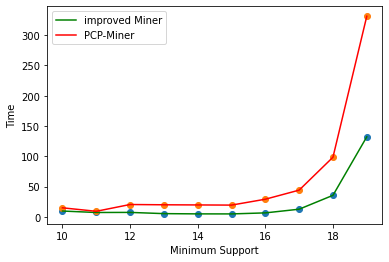

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(minsup_list,time_list_improved)
plt.plot(minsup_list, time_list_improved, c='g', label="improved Miner")
plt.scatter(minsup_list,time_list_original)
plt.plot(minsup_list, time_list_original, c='r',label="PCP-Miner")
plt.legend(loc="upper left")
plt.xlabel('Minimum Support')
plt.ylabel('Time')
plt.show()